# EMAIL SPAM CLASSIFIER

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [161]:
df=pd.read_csv('spam1.csv')

In [162]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## DROPPING THE UNNAMED COLUMNS

In [163]:
df1=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [164]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [165]:
df1.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

## CHECK FOR DUPLICATE VALUES

In [166]:
df2=df1.drop_duplicates()

In [167]:
df2

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## CHECKING FOR DATA TYPES & VARIABLES

In [168]:
df2.dtypes

target    object
text      object
dtype: object

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


## CHECKING FOR UNIQUE AND VALUE COUNTS OF EACH COLUMN

In [170]:
df2['target'].unique()

array(['ham', 'spam'], dtype=object)

In [171]:
df2['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [172]:
df2['text'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [173]:
df2['text'].value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later                  

## NULL VALUES CHECK 

In [175]:
df2.isnull().sum()

target    0
text      0
dtype: int64

## LABEL ENCODING THE DATA SET

In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
le=LabelEncoder()

In [178]:
df2['target']=le.fit_transform(df2['target'])

In [179]:
df2

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [180]:
df2['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

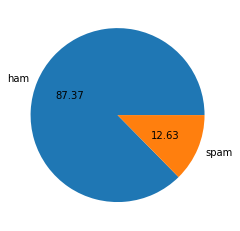

In [204]:
plt.pie(df2['target'].value_counts(), labels=["ham", "spam"], autopct="%0.2f");

In [182]:
import nltk

In [183]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natashapoddar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [184]:
df2["num_chars"] = df2['text'].apply(len)

In [181]:
df2["num_words"] = df2["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [185]:
df2

,target,text,num_words,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,160
5568,0,Will �_ b going to esplanade fr home?,9,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,57
5570,0,The guy did some bitching but I acted like i'd...,27,125


In [186]:
df2["num_sentences"] = df2["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [187]:
df2

,target,text,num_words,num_chars,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,24
1,0,Ok lar... Joking wif u oni...,8,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,37
3,0,U dun say so early hor... U c already then say...,13,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,160,35
5568,0,Will �_ b going to esplanade fr home?,9,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,15
5570,0,The guy did some bitching but I acted like i'd...,27,125,27


In [188]:
df2[df2['target'] == 0][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,17.120903
std,56.356802,13.493725,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [189]:
df2[df2['target'] == 1][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,27.675345
std,30.014336,7.011513,7.011513
min,13.000000,2.000000,2.000000
25%,131.000000,25.000000,25.000000
50%,148.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,223.000000,46.000000,46.000000


<AxesSubplot:xlabel='num_chars', ylabel='Count'>

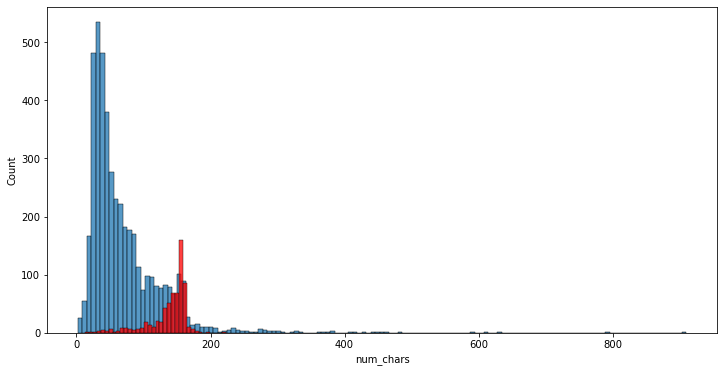

In [191]:
plt.figure(figsize=(12, 6))
sns.histplot(df2[df2['target'] == 0]["num_chars"])
sns.histplot(df2[df2['target'] == 1]["num_chars"], color='red')

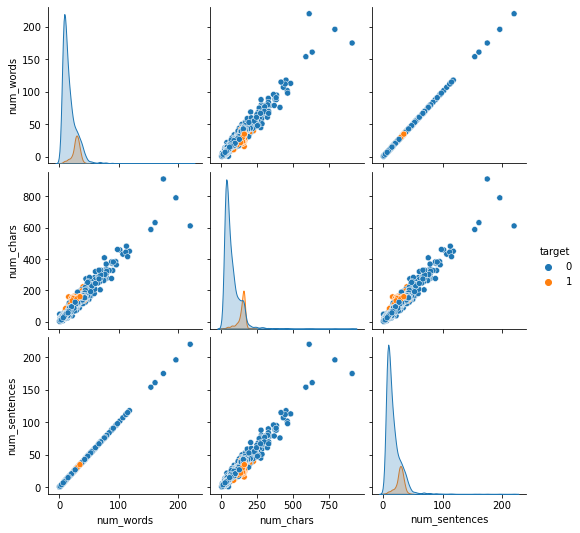

In [192]:
sns.pairplot(df2, hue="target");

<AxesSubplot:>

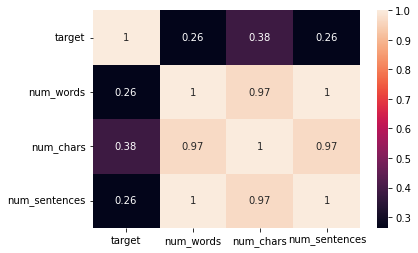

In [193]:
sns.heatmap(df2.corr(), annot=True)

In [194]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text_without_sc = []
    for t in text:
        if t.isalnum():
            text_without_sc.append(t)
            
    text = text_without_sc[:]
    text_without_sc.clear()
    transformed_text = []
    
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            transformed_text.append(i)
            
    text = transformed_text[:]
    transformed_text.clear()
    
    for i in text:
        transformed_text.append(ps.stem(i))
        
    return " ".join(transformed_text)

In [195]:
transform_text('I loved YT lectures on machine learning')

'love yt lectur machin learn'

In [196]:
df2["transform_text"] = df2["text"].apply(transform_text)

In [197]:
df2

,target,text,num_words,num_chars,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,15,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,160,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,9,37,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,125,27,guy bitch act like interest buy someth els nex...


In [198]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

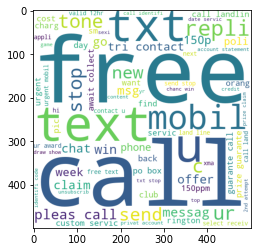

In [200]:
spam_wc = wc.generate(df2[df2["target"] == 1]["transform_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

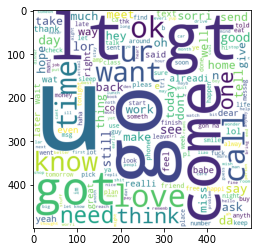

In [201]:
ham_wc = wc.generate(df2[df2["target"] == 0]["transform_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [202]:
spam_corpus = []
for msg in df2[df2["target"] == 1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [203]:
ham_corpus = []
for msg in df2[df2["target"] == 0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [316]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
ham_corpus 

## CHECKING THE FIRST 5 ROWS

In [236]:
df2.head()

,target,text,num_words,num_chars,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,15,nah think goe usf live around though


## CHECKING THE LAST 5 ROWS

In [237]:
df2.tail()

,target,text,num_words,num_chars,num_sentences,transform_text
5567,1,This is the 2nd time we have tried 2 contact u...,35,160,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,9,37,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,125,27,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,7,26,7,rofl true name


## SAMPLE ROW CHECK 

In [238]:
df2.sample()

,target,text,num_words,num_chars,num_sentences,transform_text
3389,1,Please CALL 08712402972 immediately as there i...,13,81,13,pleas call 08712402972 immedi urgent messag wait


## FEATURE EXTRACTION 

In [205]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer(max_features=3000)

In [206]:
X = tv.fit_transform(df2["transform_text"]).toarray()

In [208]:
Y = df2["target"].values

In [211]:
X.shape

(5169, 3000)

In [212]:
Y.shape

(5169,)

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## LOGISTIC REGRESSION

In [215]:
lr=LogisticRegression()

In [217]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predr))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,pred))
    print('\n')

At random_state {0} the training accuracy test is 0.9654171704957678
At random_state {0} the testing accuracy test is 0.9535783365570599


At random_state {1} the training accuracy test is 0.9678355501813785
At random_state {1} the testing accuracy test is 0.9390715667311412


At random_state {2} the training accuracy test is 0.9649334945586457
At random_state {2} the testing accuracy test is 0.9516441005802708


At random_state {3} the training accuracy test is 0.9654171704957678
At random_state {3} the testing accuracy test is 0.9487427466150871


At random_state {4} the training accuracy test is 0.9634824667472793
At random_state {4} the testing accuracy test is 0.9526112185686654


At random_state {5} the training accuracy test is 0.966384522370012
At random_state {5} the testing accuracy test is 0.9555125725338491


At random_state {6} the training accuracy test is 0.9675937122128174
At random_state {6} the testing accuracy test is 0.9545454545454546


At random_state {7} the trai

## AT RANDOM STATE 76 WE HAVE THE HIGHEST ACCURACY OF 96.71%

In [219]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=76)

In [220]:
lr=LogisticRegression()

In [221]:
lr.fit(x_train,y_train)

LogisticRegression()

In [222]:
PRELR=lr.predict(x_test)

## MODEL ACCURACY

In [223]:
print(accuracy_score(y_test,PRELR))

0.9671179883945842


## CONFUSION MATRIX

In [224]:
print(confusion_matrix(y_test,PRELR))

[[911   0]
 [ 34  89]]


## CLASSIFICATION REPORT

In [225]:
print(classification_report(y_test,PRELR))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       911
           1       1.00      0.72      0.84       123

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.96      1034



## AUC ROC CURVE

In [226]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [227]:
y_pred_prob1=lr.predict_proba(x_test)[:,1]

In [228]:
y_pred_prob1

array([0.05431541, 0.04743096, 0.8914791 , ..., 0.6576658 , 0.01586155,
       0.03718392])

In [229]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob1)

In [230]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00219539, 0.00219539,
       0.00329308, 0.00329308, 0.00439078, 0.00439078, 0.00658617,
       0.00658617, 0.00768386, 0.00768386, 0.01427003, 0.01427003,
       0.02305159, 0.02305159, 0.02414929, 0.02414929, 0.05378705,
       0.05378705, 0.07025247, 0.07025247, 0.08781559, 0.08781559,
       0.10976948, 0.10976948, 0.12952799, 0.12952799, 0.18660812,
       0.19978046, 0.3611416 , 0.36333699, 0.4478595 , 0.45005488,
       0.49286498, 0.49506037, 0.5751921 , 0.57738749, 0.78265642,
       0.78485181, 1.        ])

In [231]:
fpr

array([0.        , 0.00813008, 0.12195122, 0.13821138, 0.38211382,
       0.39837398, 0.45528455, 0.47154472, 0.48780488, 0.50406504,
       0.56097561, 0.57723577, 0.80487805, 0.80487805, 0.85365854,
       0.85365854, 0.86178862, 0.86178862, 0.8699187 , 0.8699187 ,
       0.87804878, 0.87804878, 0.91056911, 0.91056911, 0.91869919,
       0.91869919, 0.92682927, 0.92682927, 0.93495935, 0.93495935,
       0.94308943, 0.94308943, 0.95121951, 0.95121951, 0.95934959,
       0.95934959, 0.97560976, 0.97560976, 0.98373984, 0.98373984,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [232]:
thresholds

array([1.95750987, 0.95750987, 0.89807562, 0.8914791 , 0.71299253,
       0.70993066, 0.65639944, 0.65291056, 0.62381367, 0.6223561 ,
       0.59140297, 0.58072984, 0.41169786, 0.39703663, 0.35309358,
       0.33956241, 0.33653657, 0.32713992, 0.32573475, 0.30072811,
       0.28695064, 0.28509572, 0.26658264, 0.21568428, 0.20538905,
       0.17662103, 0.17598073, 0.17387627, 0.17121522, 0.11946569,
       0.11895213, 0.10603882, 0.1055141 , 0.09472056, 0.09466578,
       0.0879668 , 0.08770189, 0.07905207, 0.0787804 , 0.06678008,
       0.06658673, 0.05072016, 0.05071542, 0.04571133, 0.04570138,
       0.04272224, 0.04268875, 0.03885988, 0.03884069, 0.02907352,
       0.02902565, 0.00759288])

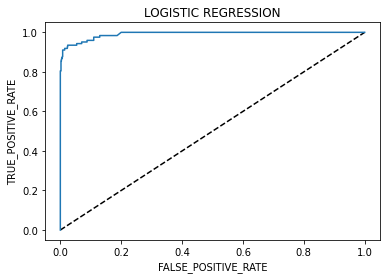

In [233]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='LR')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [234]:
auc_score=roc_auc_score(y_test,(lr.predict(x_test)))
auc_score

0.8617886178861789

## SVC

In [239]:
svc=SVC()

In [240]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_train)
    predsvc1=svc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predsvc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predsvc1))
    print('\n')

At random_state {0} the training accuracy test is 0.9963724304715841
At random_state {0} the testing accuracy test is 0.9738878143133463


At random_state {1} the training accuracy test is 0.9954050785973397
At random_state {1} the testing accuracy test is 0.965183752417795


At random_state {2} the training accuracy test is 0.9963724304715841
At random_state {2} the testing accuracy test is 0.9729206963249516


At random_state {3} the training accuracy test is 0.9963724304715841
At random_state {3} the testing accuracy test is 0.9729206963249516


At random_state {4} the training accuracy test is 0.9956469165659009
At random_state {4} the testing accuracy test is 0.971953578336557


At random_state {5} the training accuracy test is 0.9961305925030229
At random_state {5} the testing accuracy test is 0.9729206963249516


At random_state {6} the training accuracy test is 0.9958887545344619
At random_state {6} the testing accuracy test is 0.9758220502901354


At random_state {7} the train

## AT RANDOM STATE 14 WE HAVE THE HIGHEST ACCURACY 98.45%

In [242]:
svc=SVC(probability=True)

In [244]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=14)

In [245]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [246]:
PRESVC=svc.predict(x_test)

## MODEL ACCURACY

In [247]:
print(accuracy_score(y_test,PRESVC))

0.9845261121856866


## CONFUSION MATRIX

In [248]:
print(confusion_matrix(y_test,PRESVC))

[[913   0]
 [ 16 105]]


## CLASSIFICATION REPORT

In [249]:
print(classification_report(y_test,PRESVC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       1.00      0.87      0.93       121

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



## AUC ROC CURVE

In [251]:
y_pred_prob2=svc.predict_proba(x_test)[:,1]

In [252]:
y_pred_prob2

array([0.01379282, 0.00760989, 0.00407339, ..., 0.0015331 , 0.02239222,
       0.0028588 ])

In [253]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob2)

In [254]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00109529, 0.00109529, 0.00328587, 0.00328587,
       0.00657174, 0.00657174, 0.01204819, 0.01204819, 0.01533406,
       0.01533406, 0.03066813, 0.03066813, 0.05366922, 0.05366922,
       0.05476451, 0.05476451, 0.10405257, 0.10405257, 0.18619934,
       0.18948521, 0.19605696, 0.19605696, 0.3932092 , 0.3932092 ,
       0.39759036, 0.40635268, 0.93318729, 0.93537788, 0.97590361,
       0.97809419, 1.        ])

In [255]:
fpr

array([0.        , 0.00826446, 0.04958678, 0.0661157 , 0.27272727,
       0.2892562 , 0.32231405, 0.33884298, 0.42975207, 0.44628099,
       0.90082645, 0.90082645, 0.91735537, 0.91735537, 0.92561983,
       0.92561983, 0.9338843 , 0.9338843 , 0.94214876, 0.94214876,
       0.95041322, 0.95041322, 0.95867769, 0.95867769, 0.96694215,
       0.96694215, 0.97520661, 0.97520661, 0.98347107, 0.98347107,
       0.98347107, 0.98347107, 0.99173554, 0.99173554, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [256]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999980e-01, 9.99999980e-01, 9.99999980e-01, 9.99999980e-01,
       9.99999865e-01, 9.99999865e-01, 7.85455088e-01, 7.79069925e-01,
       7.28392746e-01, 6.24217904e-01, 5.97402773e-01, 4.52451736e-01,
       3.55648620e-01, 2.26791889e-01, 1.83048631e-01, 1.71289109e-01,
       1.65771736e-01, 1.12271024e-01, 1.05106160e-01, 6.83782827e-02,
       6.74899884e-02, 6.50340850e-02, 6.38935673e-02, 3.55628428e-02,
       3.51485266e-02, 2.03699031e-02, 2.03074089e-02, 1.93515366e-02,
       1.91211486e-02, 7.68890102e-03, 7.68082832e-03, 7.57338372e-03,
       7.56710445e-03, 9.24887119e-04, 9.22851925e-04, 5.00953581e-04,
       4.73717255e-04, 4.17472753e-05])

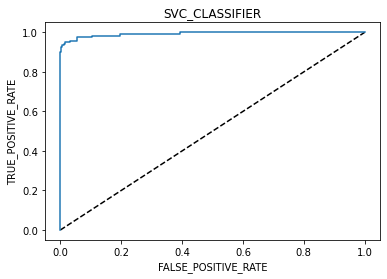

In [257]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('SVC_CLASSIFIER')
plt.show()

In [258]:
auc_score=roc_auc_score(y_test,(svc.predict(x_test)))
auc_score

0.9338842975206612

In [266]:
from sklearn.naive_bayes import GaussianNB

## GAUSSIAN MB

In [268]:
gb=GaussianNB()

In [270]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    gb.fit(x_train,y_train)
    predgb=gb.predict(x_train)
    predgb1=gb.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predgb))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predgb1))
    print('\n')

At random_state {0} the training accuracy test is 0.8972188633615478
At random_state {0} the testing accuracy test is 0.8704061895551257


At random_state {1} the training accuracy test is 0.8918984280532044
At random_state {1} the testing accuracy test is 0.8558994197292069


At random_state {2} the training accuracy test is 0.8918984280532044
At random_state {2} the testing accuracy test is 0.8704061895551257


At random_state {3} the training accuracy test is 0.8977025392986699
At random_state {3} the testing accuracy test is 0.8578336557059961


At random_state {4} the training accuracy test is 0.8952841596130593
At random_state {4} the testing accuracy test is 0.8617021276595744


At random_state {5} the training accuracy test is 0.8991535671100362
At random_state {5} the testing accuracy test is 0.851063829787234


At random_state {6} the training accuracy test is 0.9022974607013301
At random_state {6} the testing accuracy test is 0.8626692456479691


At random_state {7} the trai

## AT RANDOM STATE 75 WE HAVE THE HIGHEST ACCURACY 88.29%

In [272]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=75)

In [273]:
gb.fit(x_train,y_train)

GaussianNB()

In [274]:
PREMB=gb.predict(x_test)

## MODEL ACCURACY

In [275]:
print(accuracy_score(y_test,PREMB))

0.8829787234042553


## CONFUSION MATRIX

In [276]:
print(confusion_matrix(y_test,PREMB))

[[799 105]
 [ 16 114]]


## CLASSIFICATION REPORT

In [277]:
print(classification_report(y_test,PREMB))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       904
           1       0.52      0.88      0.65       130

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



## AUC ROC CURVE

In [280]:
y_pred_prob3=gb.predict_proba(x_test)[:,1]

In [281]:
y_pred_prob3

array([0., 1., 1., ..., 0., 1., 0.])

In [282]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob3)

In [283]:
tpr

array([0.        , 0.11615044, 1.        ])

In [284]:
fpr

array([0.        , 0.87692308, 1.        ])

In [285]:
thresholds

array([2., 1., 0.])

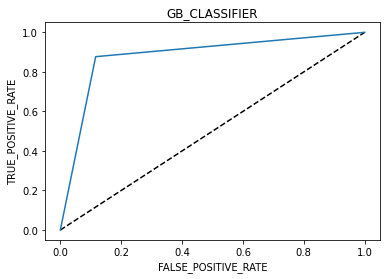

In [286]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='GB')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('GB_CLASSIFIER')
plt.show()

In [287]:
auc_score=roc_auc_score(y_test,(gb.predict(x_test)))
auc_score

0.8803863172226004

## RANDOM FOREST CLASSIFIER 

In [289]:
rm=RandomForestClassifier()

In [290]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    rm.fit(x_train,y_train)
    predrm=rm.predict(x_train)
    predrm1=rm.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predrm))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predrm1))
    print('\n')

At random_state {0} the training accuracy test is 0.9992744860943168
At random_state {0} the testing accuracy test is 0.9758220502901354


At random_state {1} the training accuracy test is 0.9995163240628778
At random_state {1} the testing accuracy test is 0.9680851063829787


At random_state {2} the training accuracy test is 0.999758162031439
At random_state {2} the testing accuracy test is 0.9758220502901354


At random_state {3} the training accuracy test is 0.9995163240628778
At random_state {3} the testing accuracy test is 0.9680851063829787


At random_state {4} the training accuracy test is 0.9992744860943168
At random_state {4} the testing accuracy test is 0.9729206963249516


At random_state {5} the training accuracy test is 0.9992744860943168
At random_state {5} the testing accuracy test is 0.9729206963249516


At random_state {6} the training accuracy test is 0.9995163240628778
At random_state {6} the testing accuracy test is 0.9758220502901354


At random_state {7} the trai

## AT RANDOM STATE 24 WE HAVE THE HIGHEST ACCURACY 98.16%

In [291]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=24)

In [292]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [293]:
PRERM=rm.predict(x_test)

## MODEL ACCURACY

In [294]:
print(accuracy_score(y_test,PRERM))

0.9825918762088974


## CONFUSION MATRIX

In [295]:
print(confusion_matrix(y_test,PRERM))

[[918   3]
 [ 15  98]]


## CLASSIFICATION REPORT

In [296]:
print(classification_report(y_test,PRERM))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       921
           1       0.97      0.87      0.92       113

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## AUC ROC CURVE

In [298]:
y_pred_prob4=rm.predict_proba(x_test)[:,1]

In [299]:
y_pred_prob4

array([0.01      , 0.        , 0.02      , ..., 0.09592968, 0.        ,
       0.01354059])

In [300]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob4)

In [301]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00108578, 0.00108578, 0.00108578, 0.00217155, 0.00217155,
       0.00325733, 0.00325733, 0.00542888, 0.00760043, 0.00760043,
       0.01194354, 0.01194354, 0.01520087, 0.01737242, 0.01737242,
       0.02062975, 0.02062975, 0.0228013 , 0.02605863, 0.02714441,
       0.03365907, 0.03583062, 0.03908795, 0.04234528, 0.04234528,
       0.04343105, 0.04560261, 0.04668838, 0.05211726, 0.05537459,
       0.05754615, 0.05863192, 0.06297503, 0.06731813, 0.07274701,
       0.07491857, 0.08034745, 0.09011944, 0.09337676, 0.09989142,
       0.10966341, 0.11834962, 0.12269273, 0.12920738, 0.13246471,
       0.14332248, 0.15418024, 0.15418024, 0.165038  , 0.165038  ,
       0.17480999, 0.18458198, 0.19652552, 0.20521173, 0.22258

In [302]:
fpr

array([0.        , 0.08849558, 0.16814159, 0.18584071, 0.21238938,
       0.22123894, 0.26548673, 0.2920354 , 0.30088496, 0.34513274,
       0.3539823 , 0.39823009, 0.43362832, 0.45132743, 0.47787611,
       0.53982301, 0.59292035, 0.69026549, 0.7079646 , 0.72566372,
       0.72566372, 0.74336283, 0.82300885, 0.84955752, 0.85840708,
       0.85840708, 0.89380531, 0.89380531, 0.89380531, 0.90265487,
       0.90265487, 0.92035398, 0.92035398, 0.92920354, 0.9380531 ,
       0.9380531 , 0.94690265, 0.94690265, 0.94690265, 0.94690265,
       0.94690265, 0.94690265, 0.94690265, 0.94690265, 0.95575221,
       0.95575221, 0.95575221, 0.95575221, 0.95575221, 0.95575221,
       0.95575221, 0.95575221, 0.95575221, 0.96460177, 0.96460177,
       0.96460177, 0.96460177, 0.96460177, 0.96460177, 0.96460177,
       0.96460177, 0.96460177, 0.96460177, 0.96460177, 0.96460177,
       0.97345133, 0.97345133, 0.98230088, 0.98230088, 0.99115044,
       0.99115044, 0.99115044, 0.99115044, 0.99115044, 0.99115

In [303]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.90000000e-01, 9.80000000e-01,
       9.70000000e-01, 9.60666667e-01, 9.60000000e-01, 9.50000000e-01,
       9.40400000e-01, 9.40000000e-01, 9.20000000e-01, 9.10000000e-01,
       8.90000000e-01, 8.70000000e-01, 8.60000000e-01, 8.30344828e-01,
       8.10000000e-01, 7.02381624e-01, 7.00000000e-01, 6.90000000e-01,
       6.80000000e-01, 6.70000000e-01, 5.60000000e-01, 5.50000000e-01,
       5.30344828e-01, 5.10000000e-01, 4.67835236e-01, 4.20000000e-01,
       4.10000000e-01, 3.65000000e-01, 3.22755563e-01, 3.03164348e-01,
       2.75000000e-01, 2.70000000e-01, 2.60000000e-01, 2.49262166e-01,
       2.48333333e-01, 2.40000000e-01, 2.30000000e-01, 2.27791978e-01,
       2.20000000e-01, 2.16666667e-01, 2.10000000e-01, 2.06666667e-01,
       2.01666667e-01, 2.00000000e-01, 1.90000000e-01, 1.80689655e-01,
       1.80000000e-01, 1.71284758e-01, 1.70000000e-01, 1.60968687e-01,
       1.60000000e-01, 1.50000000e-01, 1.30645161e-01, 1.30000000e-01,
      

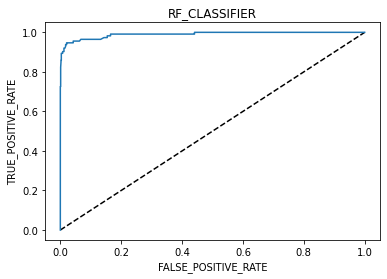

In [304]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='RFC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RF_CLASSIFIER')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,(rm.predict(x_test)))
auc_score

## CROSS VAL SCORE

In [305]:
for m in [lr,svc,gb,rm]:
    cv=cross_val_score(m,X,Y,cv=8)
    print('CV','is',(cv.mean()))

CV is 0.9574375182432853
CV is 0.9756224848191941
CV is 0.8603207348993449
CV is 0.9738795033998306


## THERE IS SLIGHT OVER FITTING IN THE DATA SET

## DIFFERENCE BETWEEN CV MEAN SCORE AND MODEL ACCURACY 

In [308]:
96.71-95.74

0.9699999999999989

In [309]:
98.45-97.56

0.8900000000000006

In [310]:
88.29-86.03

2.260000000000005

In [311]:
98.25-97.38

0.8700000000000045

### WE WILL HYPER TUNE RANDOM FOREST CLASSIFIER AS THE DIFFERENCE BETWEEN MODEL ACCURACY AND THE CV MEAN SCORE IS THE MINIMUM ADN IT IS 2ND HIGHEST IN TERMS OF ACCURACY PERCENTAGE

## HYPER TUNE - RANDOM FOREST CLASSIFIER 

In [312]:
RM2=RandomForestClassifier()

In [313]:
DD={'n_estimators':[50,100,150],'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,3,4,],'min_samples_leaf':[1,2,3]}

In [314]:
gd=GridSearchCV(RM2,DD,cv=5,scoring='accuracy')

In [315]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [317]:
gd.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [318]:
RM3=RandomForestClassifier(n_estimators=50,criterion='gini',min_samples_split=3,min_samples_leaf=1)

In [319]:
RM3.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=50)

In [321]:
PRERM3=RM3.predict(x_test)

## MODEL ACCURACY

In [322]:
print(accuracy_score(y_test,PRERM3))

0.9690522243713733


## CONFUSION MATRIX

In [ ]:
print(confusion_matrix(y_test,PRERM3))

## CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test,PRERM3))

## AUC ROC CURVE

In [323]:
y_pred_prob7=RM3.predict_proba(x_test)[:,1]

In [324]:
y_pred_prob7

array([0.15333333, 0.03640588, 0.00444532, ..., 0.02      , 0.        ,
       0.90076923])

In [325]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob7)

In [326]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00111235, 0.00111235, 0.00222469, 0.00222469, 0.00444939,
       0.00444939, 0.00889878, 0.00889878, 0.01001112, 0.01001112,
       0.01112347, 0.01112347, 0.01223582, 0.01446051, 0.01779755,
       0.0189099 , 0.02335929, 0.02335929, 0.02558398, 0.03003337,
       0.03003337, 0.03337041, 0.03337041, 0.0378198 , 0.0378198 ,
       0.03893215, 0.03893215, 0.04226919, 0.04449388, 0.05450501,
       0.05450501, 0.07675195, 0.08008899, 0.08787542, 0.08787542,
       0.09121246, 0.09343715, 0.09566185, 0.09899889, 0.10678532,
       0.10901001, 0.11234705, 0.11457175, 0.11790879, 0.12013348,
       0.12347052, 0.12458287, 0.1323693 , 0.13348165, 0.13570634,
       0.14126808, 0.14460512, 0.15016685, 0.15239155, 0.15572

In [327]:
fpr

array([0.        , 0.0962963 , 0.12592593, 0.14074074, 0.14814815,
       0.18518519, 0.20740741, 0.22222222, 0.22962963, 0.25185185,
       0.26666667, 0.35555556, 0.37037037, 0.43703704, 0.45185185,
       0.6       , 0.61481481, 0.71111111, 0.72592593, 0.73333333,
       0.73333333, 0.77777778, 0.77777778, 0.78518519, 0.78518519,
       0.83703704, 0.83703704, 0.84444444, 0.84444444, 0.85185185,
       0.85925926, 0.87407407, 0.87407407, 0.87407407, 0.87407407,
       0.88148148, 0.88148148, 0.88888889, 0.88888889, 0.88888889,
       0.8962963 , 0.8962963 , 0.91111111, 0.91111111, 0.91851852,
       0.91851852, 0.92592593, 0.92592593, 0.92592593, 0.92592593,
       0.94074074, 0.94074074, 0.94074074, 0.94074074, 0.94814815,
       0.94814815, 0.94814815, 0.94814815, 0.94814815, 0.94814815,
       0.94814815, 0.94814815, 0.94814815, 0.94814815, 0.94814815,
       0.94814815, 0.94814815, 0.94814815, 0.94814815, 0.94814815,
       0.94814815, 0.94814815, 0.94814815, 0.94814815, 0.94814

In [328]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.80000000e-01, 9.75000000e-01,
       9.70000000e-01, 9.60000000e-01, 9.46666667e-01, 9.40000000e-01,
       9.28333333e-01, 9.23333333e-01, 9.20000000e-01, 8.66666667e-01,
       8.60000000e-01, 8.13333333e-01, 8.11666667e-01, 6.80909091e-01,
       6.63333333e-01, 6.05000000e-01, 5.96666667e-01, 5.90714286e-01,
       5.68666667e-01, 5.15000000e-01, 5.08666667e-01, 5.03333333e-01,
       4.96666667e-01, 4.28333333e-01, 3.85000000e-01, 3.84666667e-01,
       3.73333333e-01, 3.62619048e-01, 3.36666667e-01, 3.26666667e-01,
       3.24000000e-01, 3.08666667e-01, 2.90000000e-01, 2.80000000e-01,
       2.68333333e-01, 2.66666667e-01, 2.55124542e-01, 2.50000000e-01,
       2.41583851e-01, 2.31333333e-01, 2.30000000e-01, 2.26410256e-01,
       2.25238095e-01, 2.20000000e-01, 2.15382065e-01, 2.14266667e-01,
       2.10000000e-01, 1.74979715e-01, 1.65111989e-01, 1.21666667e-01,
       1.20000000e-01, 1.10000000e-01, 1.08286329e-01, 1.03666667e-01,
      

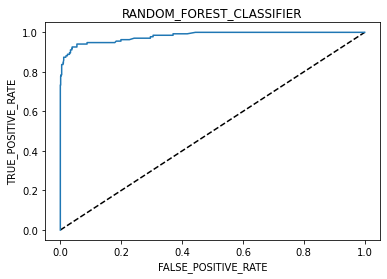

In [329]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RANDOM_FOREST_CLASSIFIER')
plt.show()

In [330]:
auc_score=roc_auc_score(y_test,(RM3.predict(x_test)))
auc_score

0.8909240720141721

## SINCE THE ACCURACY SCORE HASNT IMPROVED, WE WILL SELECT rm MODEL 

## SAVING THE BEST MODEL 

In [331]:
import pickle

In [332]:
filename='churn.pkl'
pickle.dump(rm,open(filename,'wb'))

In [333]:
loaded_model=pickle.load(open('churn.pkl','rb'))

In [334]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['PREDICTED','ORIGINAL'])

In [335]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
PREDICTED,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
ORIGINAL,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
